In [ ]:
import pandas as pd;
preprocessed_df = pd.read_csv("../data/raw/combined_responses.csv", low_memory=False)
preprocessed_df

## Cleaning Headers

In [179]:
# Check for the column headers convention
print(preprocessed_df.columns)

Index(['What is your age (# years)?', 'What is your gender? ',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired)',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'What is your current yearly compensation (approximate $USD)?',
       'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
       'What is the primary tool that you use at work or school to analyze data? ',
       'How long have you been writing code to analyze data (at work or at school)?',
       'Wha

In [180]:
# Remove leading and trailing spaces from column headers
df = preprocessed_df.rename(columns=lambda x: x.strip(), inplace=True)
# Check for the formatted columns names 
print(preprocessed_df.columns)

Index(['What is your age (# years)?', 'What is your gender?',
       'In which country do you currently reside?',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Select the title most similar to your current role (or most recent title if retired)',
       'What is the size of the company where you are employed?',
       'Approximately how many individuals are responsible for data science workloads at your place of business?',
       'Does your current employer incorporate machine learning methods into their business?',
       'What is your current yearly compensation (approximate $USD)?',
       'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?',
       'What is the primary tool that you use at work or school to analyze data?',
       'How long have you been writing code to analyze data (at work or at school)?',
       'What 

In [181]:
import pandas as pd
from ydata_profiling import ProfileReport

In [182]:
# Create the profile report
profile_preprocessed_survey = ProfileReport(preprocessed_df)
profile_preprocessed_survey.to_file('profile_preprocessed_survey.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Handle Missing Values

### Remove column with High Missing Value Percentage

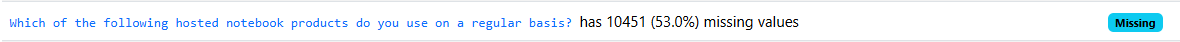
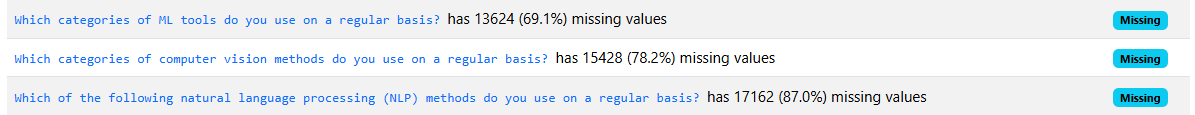
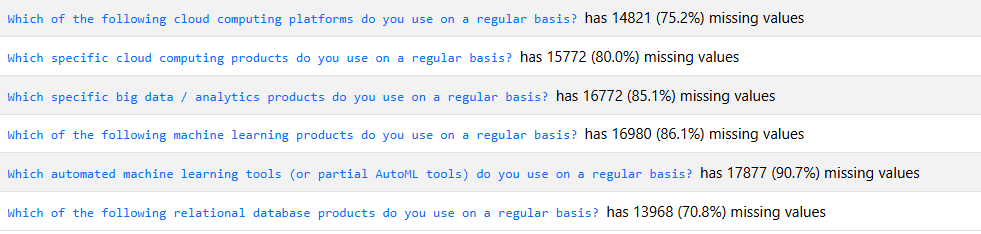

In [185]:
# Set the threshold of 50% for dropping columns
threshold = 0.5 * preprocessed_df.shape[0]

# Drop columns with more than 50% missing values
preprocessed_df = preprocessed_df.dropna(thresh=threshold, axis=1)

# Display the modified DataFrame to confirm columns are removed
preprocessed_df.head()

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,"Twitter (data science influencers), Kaggle (fo...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,None,None
1,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...","5,000-7,499","> $100,000 ($USD)",...,"Kaggle (forums, blog, social media, etc), YouT...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Microsoft Azure Notebooks,"Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...",Automation of full ML pipelines (e.g. Google A...,"Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Google Colab , Google Cloud Notebook Product...","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",None,"Scikit-learn , RandomForest, Xgboost , Li..."


In [186]:
preprocessed_df.shape

(19717, 25)

### Drop Rows with Missing Values

In [187]:
# Check that all columns exist in DataFrame
columns_with_missing = [
    'Which of the following machine learning frameworks do you use on a regular basis?',
    'What programming languages do you use on a regular basis?',
    'What data visualization libraries or tools do you use on a regular basis?',
    'Which types of specialized hardware do you use on a regular basis?',
    'Which of the following ML algorithms do you use on a regular basis?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,"Twitter (data science influencers), Kaggle (fo...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,None,None
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Microsoft Azure Notebooks,"Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...",Automation of full ML pipelines (e.g. Google A...,"Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Google Colab , Google Cloud Notebook Product...","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",None,"Scikit-learn , RandomForest, Xgboost , Li..."
5,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","60,000-69,999","$10,000-$99,999",...,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",None,"RStudio , Other",None,"Python, R",Ggplot / ggplot2,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Automated model selection (e.g. auto-sklearn, ...","Scikit-learn , TensorFlow , Keras , Rand..."
6,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,"Kaggle (forums, blog, social media, etc), Cour...","Udacity, Coursera, edX, Kaggle Courses (i.e. K...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Notebooks (Kernels) , Google Colab , ...","Python, R, Bash","Matplotlib , Plotly / Plotly Express , Boke...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Automated data augmentation (e.g. imgaug, albu...","Scikit-learn , TensorFlow , Keras , PyTo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,25-29,Male,India,Master’s degree,Data Scientist,0-4

In [188]:
preprocessed_df.shape

(13753, 25)

In [189]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

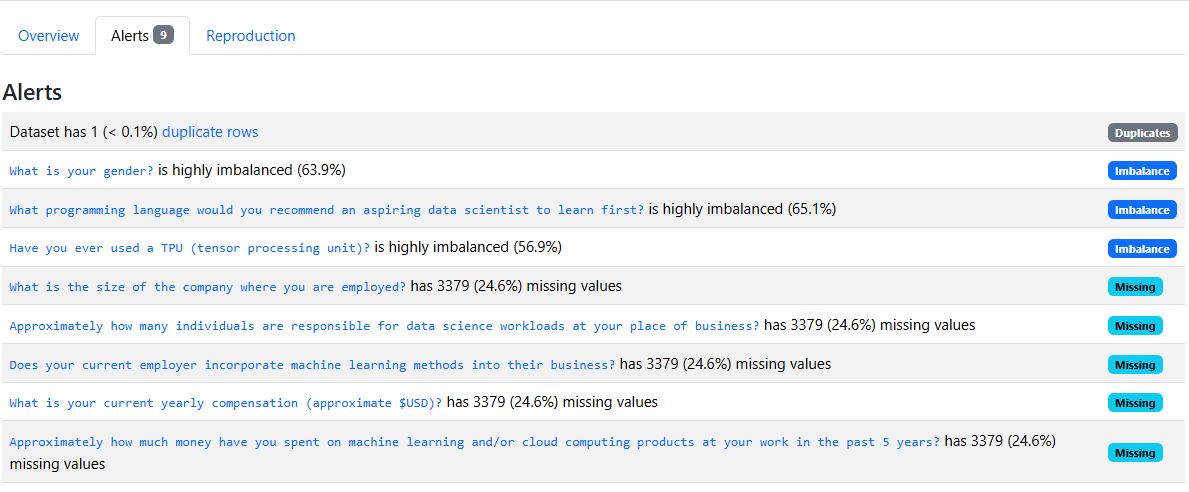

In [190]:
# Drop rows with remaining missing values
# Check that all columns exist in DataFrame
columns_with_missing = [
    'What is the size of the company where you are employed?',
    'Approximately how many individuals are responsible for data science workloads at your place of business?',
    'Does your current employer incorporate machine learning methods into their business?',
    'What is your current yearly compensation (approximate $USD)?',
    'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'
]

# Filter to keep only existing columns
existing_columns = [col for col in columns_with_missing if col in preprocessed_df.columns]

# Drop rows with missing values in the specified columns
preprocessed_df = preprocessed_df.dropna(subset=existing_columns)
preprocessed_df

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,"Twitter (data science influencers), Kaggle (fo...","Coursera, DataCamp, Kaggle Courses (i.e. Kaggl...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",None,"Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,None,None
3,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,"Podcasts (Chai Time Data Science, Linear Digre...","Coursera, edX, DataCamp, University Courses (r...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Microsoft Azure Notebooks,"Python, R, SQL, Bash","Ggplot / ggplot2 , Matplotlib , Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...",Automation of full ML pipelines (e.g. Google A...,"Scikit-learn , TensorFlow , Keras , Rand..."
4,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",Other,"Jupyter (JupyterLab, Jupyter Notebooks, etc)","Google Colab , Google Cloud Notebook Product...","Python, SQL","Matplotlib , Plotly / Plotly Express , Seab...","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",None,"Scikit-learn , RandomForest, Xgboost , Li..."
5,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","60,000-69,999","$10,000-$99,999",...,"YouTube (Cloud AI Adventures, Siraj Raval, etc...",None,"RStudio , Other",None,"Python, R",Ggplot / ggplot2,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Automated model selection (e.g. auto-sklearn, ...","Scikit-learn , TensorFlow , Keras , Rand..."
6,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,"Kaggle (forums, blog, social media, etc), Cour...","Udacity, Coursera, edX, Kaggle Courses (i.e. K...","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...","Kaggle Notebooks (Kernels) , Google Colab , ...","Python, R, Bash","Matplotlib , Plotly / Plotly Express , Boke...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Automated data augmentation (e.g. imgaug, albu...","Scikit-learn , TensorFlow , Keras , PyTo..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19443,25-29,Male,India,Master’s degree,Data Scientist,0-4

In [191]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Address the imbalanced data profile
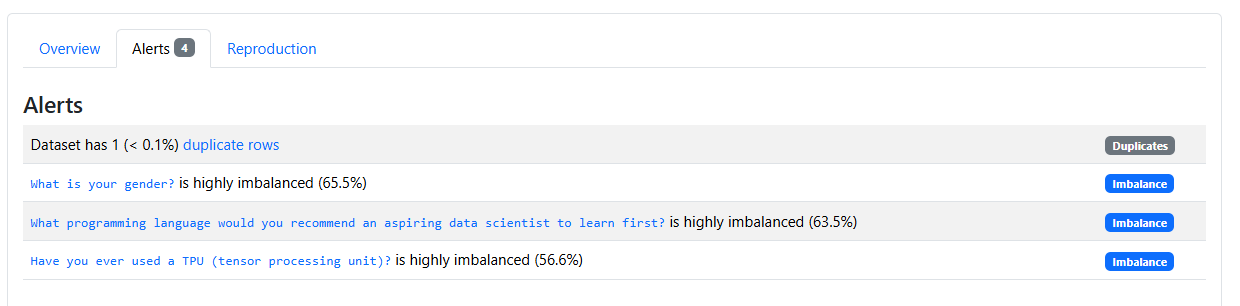

Address the imbalanced gender categorical data
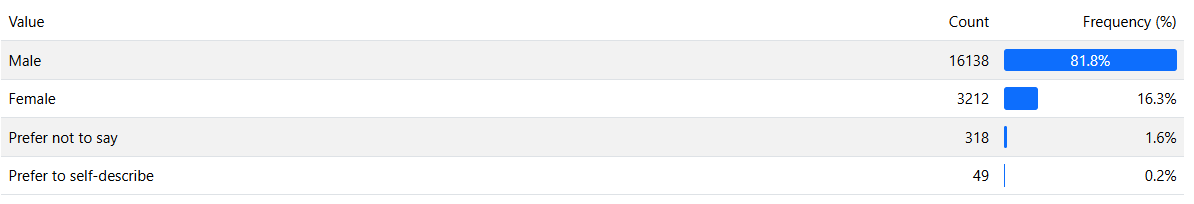

In [192]:
import numpy as np

# Define the minor categories to be grouped
minor_categories = ["Prefer not to say", "Prefer to self-describe"]

# Calculate proportions of "Male" and "Female" and normalize to sum to 1
gender_counts = preprocessed_df['What is your gender?'].value_counts(normalize=True)
male_ratio = gender_counts['Male']
female_ratio = gender_counts['Female']
total_ratio = male_ratio + female_ratio

# Normalize the probabilities
male_ratio_normalized = male_ratio / total_ratio
female_ratio_normalized = female_ratio / total_ratio

# Map the minor categories proportionally to "Male" and "Female"
preprocessed_df['What is your gender?'] = preprocessed_df['What is your gender?'].apply(
    lambda x: np.random.choice(['Male', 'Female'], p=[male_ratio_normalized, female_ratio_normalized]) if x in minor_categories else x
)

# Verify the updated distribution
print(preprocessed_df['What is your gender?'].value_counts(normalize=True) * 100)

Male      86.061307
Female    13.938693
Name: What is your gender?, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\2320220332.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What is your gender?'] = preprocessed_df['What is your gender?'].apply(


In [193]:
preprocessed_df.shape

(10374, 25)

Check for programming language recommendations distributions

In [194]:
# Calculate the frequency distribution
language_distribution = preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True) * 100
language_distribution

Python        76.932716
R             10.179294
SQL            6.911510
C++            1.214575
MATLAB         1.079622
Other          1.050704
C              0.780798
Java           0.636206
None           0.549451
Javascript     0.327742
Bash           0.289184
TypeScript     0.048197
Name: What programming language would you recommend an aspiring data scientist to learn first?, dtype: float64

In [195]:
# Dynamically identify languages with less than 5% representation
languages_to_group = language_distribution[language_distribution < 5].index.tolist()

# Map languages with <5% frequency to "Other"
preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df[
    'What programming language would you recommend an aspiring data scientist to learn first?'].apply(lambda x: 'Other' if x in languages_to_group else x)

# Verify the updated distribution after grouping
print(preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'].value_counts(normalize=True) * 100)

Python    76.932716
R         10.179294
SQL        6.911510
Other      5.976480
Name: What programming language would you recommend an aspiring data scientist to learn first?, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\979155889.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What programming language would you recommend an aspiring data scientist to learn first?'] = preprocessed_df[


In [196]:
preprocessed_df.shape

(10374, 25)

TPU (tensor processing unit) Usage </br>
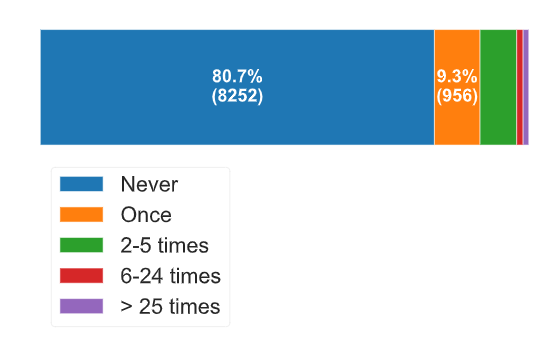

In [197]:
# Group responses into two categories: "Never" and "Used TPU"
preprocessed_df['Have you ever used a TPU (tensor processing unit)?'] = preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].replace(
    {'Once': 'Used TPU', '2-5 times': 'Used TPU', '6-24 times': 'Used TPU', '> 25 times': 'Used TPU'}
)

# Verify the distribution
print(preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].value_counts(normalize=True) * 100)

Never       80.643917
Used TPU    19.356083
Name: Have you ever used a TPU (tensor processing unit)?, dtype: float64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\3915765275.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['Have you ever used a TPU (tensor processing unit)?'] = preprocessed_df['Have you ever used a TPU (tensor processing unit)?'].replace(


In [198]:
# Create the profile report
# profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
# profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

### Remove duplicated rows

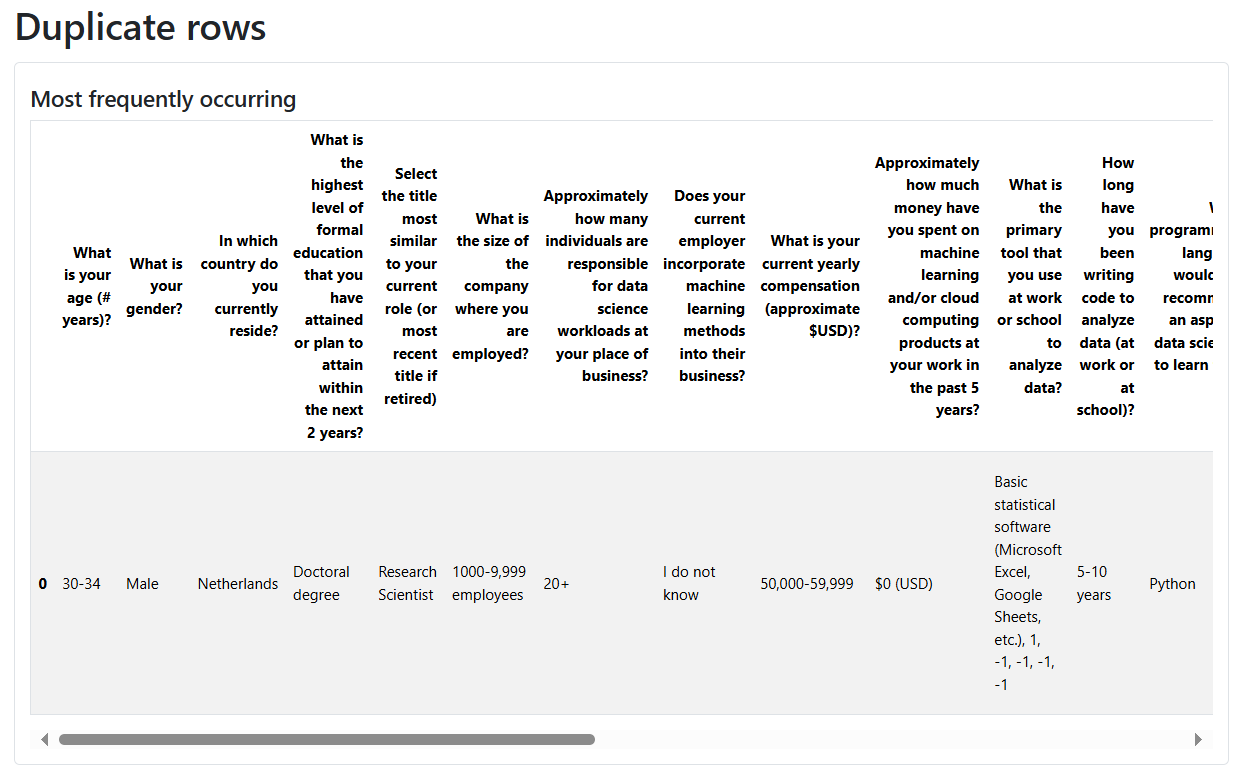

In [199]:
# Check for duplicates based on all columns
duplicates = preprocessed_df[preprocessed_df.duplicated()]
print(f"Number of duplicate rows: {len(duplicates)}")
duplicates

Number of duplicate rows: 1


,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
17494,30-34,Male,Netherlands,Doctoral degree,Research Scientist,"1000-9,999 employees",20+,I do not know,"50,000-59,999",$0 (USD),...,"Course Forums (forums.fast.ai, etc), Blogs (To...","Coursera, Fast.ai","Jupyter (JupyterLab, Jupyter Notebooks, etc) ,...",Google Colab,"Python, MATLAB",Matplotlib,"CPUs, GPUs",Convolutional Neural Networks,None,Fast.ai


In [200]:
# Remove duplicates (keeping the first occurrence)
preprocessed_df = preprocessed_df.drop_duplicates()

# Verify removal
print(f"Number of rows after removing duplicates: {len(preprocessed_df)}")

Number of rows after removing duplicates: 10373


In [201]:
# Reset the index to maintain a clean, sequential order
preprocessed_df.reset_index(drop=True, inplace=True)

In [202]:
preprocessed_df.shape

(10373, 25)

In [203]:
# Create the profile report
# profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
# profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

Addressed Column Health </br> </br> 
Before </br>
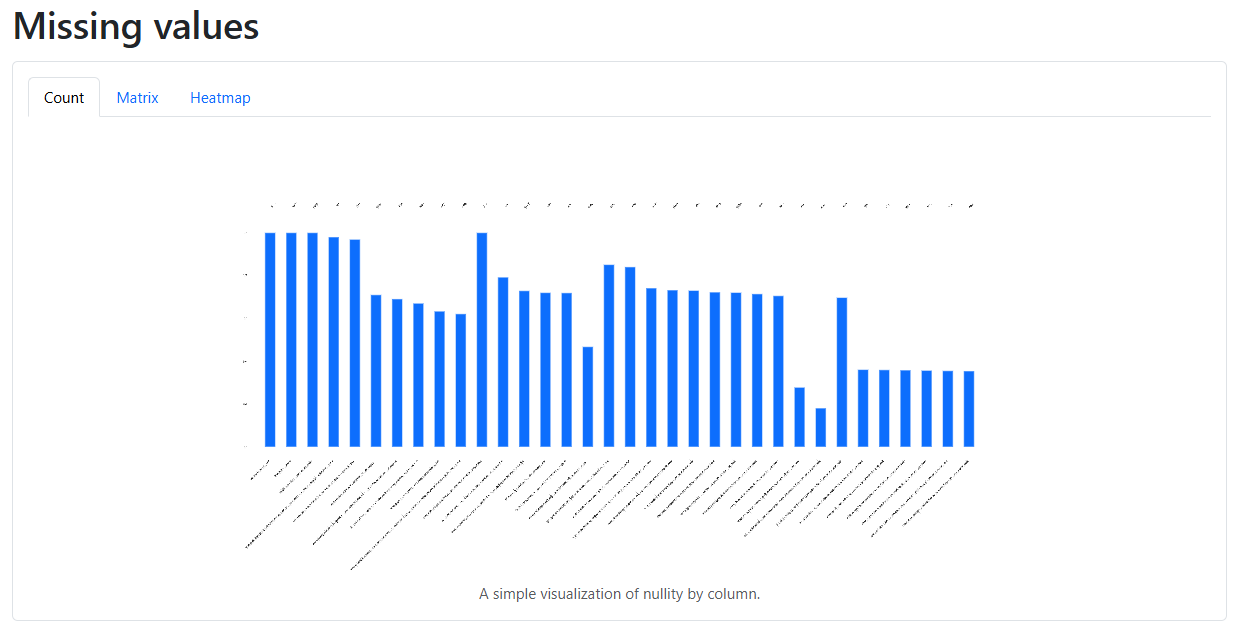 </br>  </br> 
After </br>
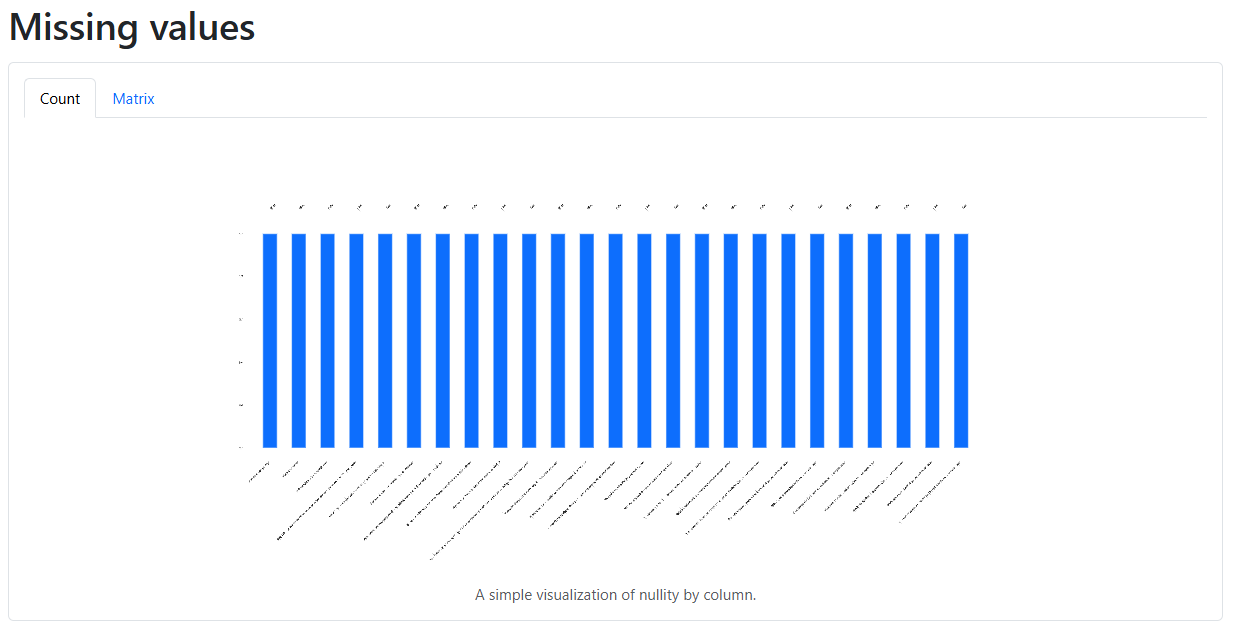

## Column Values Normalization

### Remove unnecessary details 


In [204]:
# Function to remove text within parentheses and clean up spaces for multiple columns
def clean_columns(df, columns):
    for column in columns:
        # Remove text within parentheses
        df[column] = df[column].str.replace(r"\s*\(.*?\)", "", regex=True)
        # Remove extra spaces around commas and trim leading/trailing spaces
        df[column] = df[column].str.replace(r"\s*,\s*", ", ", regex=True).str.strip()
    return df

In [205]:
# Specify the columns you want to clean
columns_to_clean = ['On which platforms have you begun or completed data science courses?', 
                    'Which of the following integrated development environments (IDE\'s) do you use on a regular basis?',
                    'What data visualization libraries or tools do you use on a regular basis?',
                    'Which of the following hosted notebook products do you use on a regular basis?',
                    'Which of the following ML algorithms do you use on a regular basis?',
                    'Which categories of ML tools do you use on a regular basis?',
                    'Which of the following machine learning frameworks do you use on a regular basis?',
                    'Who/what are your favorite media sources that report on data science topics?'
                    ]

# Apply the function to the specified columns
preprocessed_df = clean_columns(preprocessed_df, columns_to_clean)

preprocessed_df

C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\3099297713.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(r"\s*\(.*?\)", "", regex=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\3099297713.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(r"\s*,\s*", ", ", regex=True).str.strip()


,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Who/what are your favorite media sources that report on data science topics?,On which platforms have you begun or completed data science courses?,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?
0,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,"30,000-39,999",$0 (USD),...,"Twitter, Kaggle, Blogs, Journal Publications","Coursera, DataCamp, Kaggle Courses, Udemy","Jupyter, RStudio, PyCharm, MATLAB, Spyder",None,"Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,None,None
1,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,"250,000-299,999","$10,000-$99,999",...,"Podcasts, Blogs, Journal Publications, Slack C...","Coursera, edX, DataCamp, University Courses","Jupyter, Visual Studio / Visual Studio Code",Microsoft Azure Notebooks,"Python, R, SQL, Bash","Ggplot / ggplot2, Matplotlib, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...",Automation of full ML pipelines,"Scikit-learn, TensorFlow, Keras, RandomForest"
2,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),"4,000-4,999",$0 (USD),...,"YouTube, Blogs, Other",Other,Jupyter,"Google Colab, Google Cloud Notebook Products","Python, SQL","Matplotlib, Plotly / Plotly Express, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",None,"Scikit-learn, RandomForest, Xgboost, LightGBM"
3,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...","60,000-69,999","$10,000-$99,999",...,"YouTube, Blogs, Journal Publications",None,"RStudio, Other",None,"Python, R",Ggplot / ggplot2,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Automated model selection, Automated hyperpara...","Scikit-learn, TensorFlow, Keras, RandomForest,..."
4,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,20+,We are exploring ML methods (and may one day p...,"10,000-14,999",$100-$999,...,"Kaggle, Course Forums, YouTube, Podcasts, Jour...","Udacity, Coursera, edX, Kaggle Courses, Udemy","Jupyter, Spyder, Notepad++, Sublime Text","Kaggle Notebooks, Google Colab, Binder / Jupyt...","Python, R, Bash","Matplotlib, Plotly / Plotly Express, Bokeh, Se...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Automated data augmentation, Automated feature...","Scikit-learn, TensorFlow, Keras, PyTorch"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10368,25-29,Male,India,Master’s degree,Data Scientist,0-49 employees,1-2,"We recently started using ML methods (i.e., mo...","1,000-1,999",$100-$999,...,"Hacker News, Kaggle, YouTube, Slack Communit

### Normalize the features value

In [206]:
# Define a function to clean and extract the main tool category
def extract_main_tool(text):
    # Step 1: Split by comma, then take the first part
    main_tool = text.split(',')[0].strip()
    
    # Step 2: Check for "Other" and ignore it if found
    if main_tool.lower() == "other":
        return "Other"
    
    # Step 3: Split by the first '(' to remove details in parentheses, if any
    return main_tool.split('(')[0].strip()

# Apply the function to the column
preprocessed_df['What is the primary tool that you use at work or school to analyze data?'] = preprocessed_df[
    'What is the primary tool that you use at work or school to analyze data?'].apply(extract_main_tool)

# Convert the column to categorical type
preprocessed_df['What is the primary tool that you use at work or school to analyze data?'] = preprocessed_df[
    'What is the primary tool that you use at work or school to analyze data?'].astype('category')

# Verify the unique values after normalization
print(preprocessed_df['What is the primary tool that you use at work or school to analyze data?'].unique())

['Basic statistical software', 'Local development environments', 'Advanced statistical software', 'Other', 'Cloud-based data software & APIs', 'Business intelligence software']
Categories (6, object): ['Advanced statistical software', 'Basic statistical software', 'Business intelligence software', 'Cloud-based data software & APIs', 'Local development environments', 'Other']


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\3333802016.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What is the primary tool that you use at work or school to analyze data?'] = preprocessed_df[
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\3333802016.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['What is the primary tool that you use at work or school to analyze data?'] = preprocessed_df[


In [207]:
# Function to normalize Does your current employer incorporate machine learning methods into their business?
def normalize_ml_methods(df, column):
    # Dictionary to map detailed categories to simplified versions
    normalization_dict = {
        r"We recently started using ML methods.*": "Recently started",
        r"We are exploring ML methods.*": "Exploring",
        r"We have well established ML methods.*": "Well established",
        r"No.*": "No ML use",
        r"We use ML methods for generating insights.*": "Insights only",
        r"I do not know": "Unknown"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in normalization_dict.items():
        df.loc[:, column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df[column]  # Return only the modified column

# Apply the normalization function directly to the specified column
preprocessed_df['Does your current employer incorporate machine learning methods into their business?'] = normalize_ml_methods(
    preprocessed_df, 'Does your current employer incorporate machine learning methods into their business?'
)

# Display the normalized column
print(preprocessed_df['Does your current employer incorporate machine learning methods into their business?'].value_counts())

Recently started    2271
Exploring           2229
Well established    2102
No ML use           1762
Insights only       1258
Unknown              751
Name: Does your current employer incorporate machine learning methods into their business?, dtype: int64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\1446605844.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, column] = df[column].str.replace(pattern, replacement, regex=True)
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\1446605844.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['Does your current employer incorporate machine learning methods into their business?'] = normalize_ml_methods(


In [208]:
# Function to normalize company size categories
def normalize_company_size(df, column):
    # Dictionary to map detailed company size ranges to normalized versions
    size_normalization_dict = {
        r"0-49 employees": "Small",
        r"50-249 employees": "Medium",
        r"250-999 employees": "Mid-Large",
        r"1000-9,999 employees": "Large",
        r"> 10,000 employees": "Enterprise"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in size_normalization_dict.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df

# Apply the normalization function
normalize_company_size(preprocessed_df, 'What is the size of the company where you are employed?')

# Display the normalized column
preprocessed_df['What is the size of the company where you are employed?'].value_counts()

C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\1883665943.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(pattern, replacement, regex=True)


Small         2890
Enterprise    2361
Large         2042
Medium        1712
Mid-Large     1368
Name: What is the size of the company where you are employed?, dtype: int64

In [209]:
# Function to normalize spending ranges
def normalize_spending(df, column):
    # Dictionary to map specific spending ranges to simplified categories
    spending_normalization_dict = {
        r"^\$0.*": "No spending",
        r"^\$1-\$99$": "Low spending",
        r"^\$100-\$999$": "Moderate spending",
        r"^\$1000-\$9,999$": "High spending",
        r"^\$10,000-\$99,999$": "Very high spending",
        r"^> \$100,000.*": "Ultra high spending"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in spending_normalization_dict.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df

# Apply the normalization function
normalize_spending(preprocessed_df, 'Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?')

# Display the normalized column
print(preprocessed_df['Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?'].value_counts())

No spending            3214
Moderate spending      2019
High spending          1876
Low spending           1231
Very high spending     1143
Ultra high spending     890
Name: Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?, dtype: int64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\4237067571.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(pattern, replacement, regex=True)


In [210]:
# Updated function to normalize experience levels with adjusted patterns
def normalize_experience_ml(df, column):
    # Dictionary to map detailed experience ranges to normalized categories
    experience_normalization_dict = {
        r"^< 1 years$": "No experience",
        r"^1-2 years$": "Entry level",
        r"^2-3 years$": "Junior",
        r"^3-4 years$": "Junior",
        r"^4-5 years$": "Mid-level",
        r"^5-10 years$": "Mid-level",
        r"^10-15 years$": "Senior",
        r"^20\+ years$": "Expert"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in experience_normalization_dict.items():
        df.loc[:, column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df

# Apply the normalization function to the specific column
normalize_experience_ml(preprocessed_df, 'For how many years have you used machine learning methods?')

# Display the normalized column
print(preprocessed_df['For how many years have you used machine learning methods?'].value_counts())

No experience    2996
Entry level      2681
Junior           2513
Mid-level        1683
Senior            326
Expert            174
Name: For how many years have you used machine learning methods?, dtype: int64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\908534496.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, column] = df[column].str.replace(pattern, replacement, regex=True)


In [211]:
import pandas as pd

# Updated function to normalize experience levels with adjusted patterns
def normalize_experience(df, column):
    # Dictionary to map detailed experience ranges to normalized categories
    experience_normalization_dict = {
        r"^< 1 years$": "Beginner",
        r"^1-2 years$": "Novice",
        r"^2-3 years$": "Novice",
        r"^3-5 years$": "Intermediate",
        r"^5-10 years$": "Experienced",
        r"^10-20 years$": "Expert",
        r"^20\+ years$": "Expert"
    }
    
    # Apply replacements using regex patterns in one line
    for pattern, replacement in experience_normalization_dict.items():
        df[column] = df[column].replace(to_replace=pattern, value=replacement, regex=True)
    
    return df

# Apply the normalization function to the specific column
normalize_experience(preprocessed_df, 'How long have you been writing code to analyze data (at work or at school)?')

# Display the normalized column
print(preprocessed_df['How long have you been writing code to analyze data (at work or at school)?'].value_counts())

Intermediate    2710
Novice          2576
Beginner        1912
Experienced     1683
Expert          1492
Name: How long have you been writing code to analyze data (at work or at school)?, dtype: int64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\142002634.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].replace(to_replace=pattern, value=replacement, regex=True)


In [ ]:
import numpy as np
import pandas as pd

# Function to split and clean min and max compensation
def split_compensation(df, column):
    # Copy the DataFrame to avoid modifying the original
    df = df.copy()
    
    # Create two new columns for min and max compensation
    df.loc[:, 'Minimum Compensation (USD)'] = df[column].str.extract(r'\$?(\d+[,]*\d*)')[0].str.replace(',', '')
    df.loc[:, 'Maximum Compensation (USD)'] = df[column].str.extract(r'-(\d+[,]*\d*)')[0].str.replace(',', '')
    
    # Handle cases with only a minimum (e.g., "$100,000+")
    df.loc[:, 'Maximum Compensation (USD)'] = np.where(df['Maximum Compensation (USD)'].isna(), np.nan, df['Maximum Compensation (USD)'])
    
    # Convert the min and max compensation to integers, handling NaN values
    df.loc[:, 'Minimum Compensation (USD)'] = df['Minimum Compensation (USD)'].fillna(0).astype(int)
    df.loc[:, 'Maximum Compensation (USD)'] = df['Maximum Compensation (USD)'].fillna(0).astype(int)
    
    # Drop the original column
    # df.drop(columns=[column], inplace=True)
    
    return df

# Apply the function to the dataframe
preprocessed_df = split_compensation(preprocessed_df, 'What is your current yearly compensation (approximate $USD)?')

# Display the transformed DataFrame
print(preprocessed_df)

C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\410044784.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Minimum Compensation (USD)'] = df[column].str.extract(r'\$?(\d+[,]*\d*)')[0].str.replace(',', '')
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\410044784.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Maximum Compensation (USD)'] = df[column].str.extract(r'-(\d+[,]*\d*)')[0].str.replace(',', '')
C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\410044784.py:8: SettingWithCopyWa

,What is your age (# years)?,What is your gender?,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired),What is the size of the company where you are employed?,Approximately how many individuals are responsible for data science workloads at your place of business?,Does your current employer incorporate machine learning methods into their business?,What is your current yearly compensation (approximate $USD)?,Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 years?,...,Which of the following integrated development environments (IDE's) do you use on a regular basis?,Which of the following hosted notebook products do you use on a regular basis?,What programming languages do you use on a regular basis?,What data visualization libraries or tools do you use on a regular basis?,Which types of specialized hardware do you use on a regular basis?,Which of the following ML algorithms do you use on a regular basis?,Which categories of ML tools do you use on a regular basis?,Which of the following machine learning frameworks do you use on a regular basis?,Minimum Compensation (USD),Maximum Compensation (USD)
0,22-24,Male,France,Master’s degree,Software Engineer,Large,0,Unknown,"30,000-39,999",No spending,...,"Jupyter, RStudio, PyCharm, MATLAB, Spyder",None,"Python, R, SQL, Java, Javascript, MATLAB",Matplotlib,"CPUs, GPUs",Linear or Logistic Regression,None,None,30000,39999
1,40-44,Male,Australia,Master’s degree,Other,Enterprise,20+,Unknown,"250,000-299,999",Very high spending,...,"Jupyter, Visual Studio / Visual Studio Code",Microsoft Azure Notebooks,"Python, R, SQL, Bash","Ggplot / ggplot2, Matplotlib, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Convolutional N...",Automation of full ML pipelines,"Scikit-learn, TensorFlow, Keras, RandomForest",250000,299999
2,22-24,Male,India,Bachelor’s degree,Other,Small,0,No ML use,"4,000-4,999",No spending,...,Jupyter,"Google Colab, Google Cloud Notebook Products","Python, SQL","Matplotlib, Plotly / Plotly Express, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",None,"Scikit-learn, RandomForest, Xgboost, LightGBM",4000,4999
3,50-54,Male,France,Master’s degree,Data Scientist,Small,3-4,Well established,"60,000-69,999",Very high spending,...,"RStudio, Other",None,"Python, R",Ggplot / ggplot2,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...","Automated model selection, Automated hyperpara...","Scikit-learn, TensorFlow, Keras, RandomForest,...",60000,69999
4,22-24,Male,India,Master’s degree,Data Scientist,Medium,20+,Exploring,"10,000-14,999",Moderate spending,...,"Jupyter, Spyder, Notepad++, Sublime Text","Kaggle Notebooks, Google Colab, Binder / Jupyt...","Python, R, Bash","Matplotlib, Plotly / Plotly Express, Bokeh, Se...","CPUs, GPUs","Linear or Logistic Regression, Dense Neural Ne...","Automated data augmentation, Automated feature...","Scikit-learn, TensorFlow, Keras, PyTorch",10000,14999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10368,25-29,Male,India,Master’s degree,Data Scientist,Small,1-2,Recently started,"1,000-1,999",Moderate spending,...,"Jupyter, PyCharm, MATLAB, Notepad++","Google Cloud Notebook Products, AWS Notebook P...","Python, MATLAB",Matplotlib,"CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",Automated data augmentation,"Scikit-learn, TensorFlow, PyTorch, Spark MLib",1000,1999
10369,22-24,Female,Other,Bachelor’s degree,Other,Medium,1-2,Exploring,"5,000-7,499",Moderate spending,...,"Jupyter, Atom, Visual Studio / Visual Studio C...",Google Colab,Python,"Matplotlib, Seaborn","CPUs, GPUs","Linear or Logistic Regression, Decision Trees ...",Automated hyperparameter tuning,"Scikit-learn, TensorFlow, PyTorch",5000,7499
10370,25-2

In [213]:
# Function to normalize the number of people responsible for data science workloads
def normalize_ds_responsibility(df, column):
    # Dictionary to map specific ranges to normalized categories
    responsibility_normalization_dict = {
        r"^0$": "No dedicated team",
        r"^1-2$": "Small team",
        r"^3-4$": "Small team",
        r"^5-9$": "Medium team",
        r"^10-14$": "Large team",
        r"^15-19$": "Large team",
        r"^20\+$": "Very large team"
    }
    
    # Apply replacements using the dictionary
    for pattern, replacement in responsibility_normalization_dict.items():
        df[column] = df[column].str.replace(pattern, replacement, regex=True)
    
    return df

# Apply the normalization function
normalize_ds_responsibility(preprocessed_df, 'Approximately how many individuals are responsible for data science workloads at your place of business?')

# Display the normalized column
print(preprocessed_df['Approximately how many individuals are responsible for data science workloads at your place of business?'].value_counts())

Small team           4152
Very large team      2454
Medium team          1438
No dedicated team    1255
Large team           1074
Name: Approximately how many individuals are responsible for data science workloads at your place of business?, dtype: int64


C:\Users\Huawei\AppData\Local\Temp\ipykernel_12824\1386077875.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].str.replace(pattern, replacement, regex=True)


In [214]:
# Create the profile report
profile_preprocessed_survey_check = ProfileReport(preprocessed_df)
profile_preprocessed_survey_check.to_file('profile_preprocessed_survey_check.html')

c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\profile_report.py:358: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(
c:\Users\Huawei\anaconda3\lib\site-packages\ydata_profiling\utils\dataframe.py:137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"index": "df_index"}, inplace=True)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]